In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Sequential,Input,Model

In [ ]:
class_names = ['cycling','dancing','eating','hugging','sleeping','running']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [ ]:
root_path1 = '/content/drive/MyDrive/Dataset/action_net_v1/train/cycling'
root_path2 = '/content/drive/MyDrive/Dataset/action_net_v1/train/dancing'
root_path3 = '/content/drive/MyDrive/Dataset/action_net_v1/train/eating'
root_path4 = '/content/drive/MyDrive/Dataset/action_net_v1/train/hugging'
root_path5 = '/content/drive/MyDrive/Dataset/action_net_v1/train/sleeping'
root_path6 = '/content/drive/MyDrive/Dataset/action_net_v1/train/running'

In [ ]:
root_path11 = '/content/drive/MyDrive/Dataset/action_net_v1/test/cycling'
root_path22 = '/content/drive/MyDrive/Dataset/action_net_v1/test/dancing'
root_path33 = '/content/drive/MyDrive/Dataset/action_net_v1/test/eating'
root_path44 = '/content/drive/MyDrive/Dataset/action_net_v1/test/hugging'
root_path55 = '/content/drive/MyDrive/Dataset/action_net_v1/test/sleeping'
root_path66 = '/content/drive/MyDrive/Dataset/action_net_v1/test/running'

In [ ]:
data_list=[]
labels_list=[]

In [ ]:
for i in os.listdir(root_path1):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/cycling", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("cycling")

In [ ]:
for i in os.listdir(root_path2):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/dancing", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("dancing")

In [ ]:
for i in os.listdir(root_path3):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/eating", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("eating")

In [ ]:
for i in os.listdir(root_path4):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/hugging", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("hugging")

In [ ]:
for i in os.listdir(root_path5):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/sleeping", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("sleeping")

In [ ]:
for i in os.listdir(root_path6):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/running", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("running")

In [ ]:
data = np.array(data_list)

In [ ]:
from sklearn import preprocessing 
my_label = preprocessing.LabelEncoder()   
labels= my_label.fit_transform(labels_list)

In [ ]:
data_list1=[]
labels_list1=[]

In [ ]:
for i in os.listdir(root_path11):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/cycling", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("cycling")

In [ ]:
for i in os.listdir(root_path22):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/dancing", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("dancing")

In [ ]:
for i in os.listdir(root_path33):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/eating", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("eating")

In [ ]:
for i in os.listdir(root_path44):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/hugging", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("hugging")

In [ ]:
for i in os.listdir(root_path55):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/sleeping", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("sleeping")

In [ ]:
for i in os.listdir(root_path66):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/running", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("running")

In [ ]:
data1 = np.array(data_list1)

In [ ]:
from sklearn import preprocessing 
my_label = preprocessing.LabelEncoder()   
labels1= my_label.fit_transform(labels_list1)

In [ ]:
train_images, train_labels = shuffle(data, labels, random_state=25)

In [ ]:
test_images, test_labels = shuffle(data1, labels1, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]
print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 6000
Number of testing examples: 1200
Each image is of size: (150, 150)


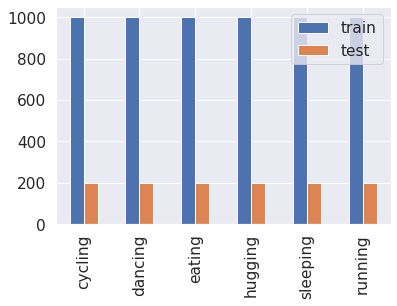

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

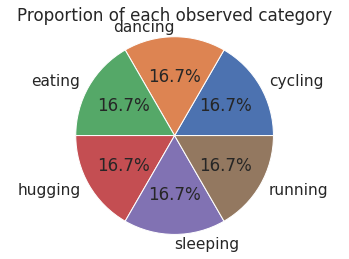

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

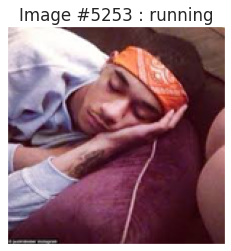

In [ ]:
display_random_image(class_names, train_images, train_labels)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
train_features = model.predict(train_images)
test_features = model.predict(test_images)

In [ ]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)

X = train_features.reshape((n_train, x*y*z))
pca.fit(X)

C = pca.transform(X) # Représentation des individus dans les nouveaux axe
C1 = C[:,0]
C2 = C[:,1]

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, train_labels, batch_size=128, epochs=15, validation_split = 0.2)

Epoch 1/15
38/38 [==============================] - 1s 13ms/step - loss: 1.0140 - accuracy: 0.6135 - val_loss: 0.6651 - val_accuracy: 0.7558
Epoch 2/15
38/38 [==============================] - 0s 6ms/step - loss: 0.5047 - accuracy: 0.8254 - val_loss: 0.5915 - val_accuracy: 0.7808
Epoch 3/15
38/38 [==============================] - 0s 6ms/step - loss: 0.3687 - accuracy: 0.8817 - val_loss: 0.5699 - val_accuracy: 0.7900
Epoch 4/15
38/38 [==============================] - 0s 6ms/step - loss: 0.2848 - accuracy: 0.9179 - val_loss: 0.5688 - val_accuracy: 0.7933
Epoch 5/15
38/38 [==============================] - 0s 7ms/step - loss: 0.2285 - accuracy: 0.9417 - val_loss: 0.5777 - val_accuracy: 0.7933
Epoch 6/15
38/38 [==============================] - 0s 7ms/step - loss: 0.1819 - accuracy: 0.9579 - val_loss: 0.5672 - val_accuracy: 0.7967
Epoch 7/15
38/38 [==============================] - 0s 7ms/step - loss: 0.1448 - accuracy: 0.9706 - val_loss: 0.5598 - val_accuracy: 0.7983
Epoch 8/15
38/38 [=

In [ ]:
test_loss = model2.evaluate(test_features, test_labels)

38/38 [==============================] - 0s 3ms/step - loss: 0.7743 - accuracy: 0.7750


In [ ]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [ ]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [ ]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], train_labels[train_idx], batch_size=128, epochs=10, validation_split = 0.1))

Epoch 1/10
34/34 [==============================] - 1s 11ms/step - loss: 1.2247 - accuracy: 0.5657 - val_loss: 0.6778 - val_accuracy: 0.7521
Epoch 2/10
34/34 [==============================] - 0s 7ms/step - loss: 0.5381 - accuracy: 0.8204 - val_loss: 0.4888 - val_accuracy: 0.8250
Epoch 3/10
34/34 [==============================] - 0s 6ms/step - loss: 0.3630 - accuracy: 0.8949 - val_loss: 0.4349 - val_accuracy: 0.8271
Epoch 4/10
34/34 [==============================] - 0s 6ms/step - loss: 0.2759 - accuracy: 0.9326 - val_loss: 0.3861 - val_accuracy: 0.8792
Epoch 5/10
34/34 [==============================] - 0s 7ms/step - loss: 0.2099 - accuracy: 0.9537 - val_loss: 0.3440 - val_accuracy: 0.8896
Epoch 6/10
34/34 [==============================] - 0s 7ms/step - loss: 0.1538 - accuracy: 0.9720 - val_loss: 0.3209 - val_accuracy: 0.8750
Epoch 7/10
34/34 [==============================] - 0s 6ms/step - loss: 0.1174 - accuracy: 0.9845 - val_loss: 0.3043 - val_accuracy: 0.8958
Epoch 8/10
34/34 [=

In [ ]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(test_labels, pred_labels)))

Accuracy : 0.7766666666666666
